# **Problem Statement:**

**We have data of people travelled by flight for a certain unknown Airlines Company from the year 1949 to 1960. We will try to analyse the data and further try to forecast number of passengers  for the period of next 5 years (i.e. from 1961 to 1965)**

# **Importing Libraries**

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

from google.colab import drive
from google.colab import files

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


# **Read Data**



In [ ]:
a=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CSV files/Etlhive Time Series/AirPassengers.csv")

In [ ]:
a

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


#**Converting Month Column to required date-time format**

In [ ]:
a["Month"] = pd.to_datetime(a["Month"],format="%Y-%m")
a.head(3)

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132


# **Setting index to Month column and renaming columns**

In [ ]:
a.set_index("Month",inplace=True)

In [ ]:
a.rename(mapper={"#Passengers":"Pass"},axis=1,inplace=True)

In [ ]:
a.head(3)

,Pass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


# **Plot**

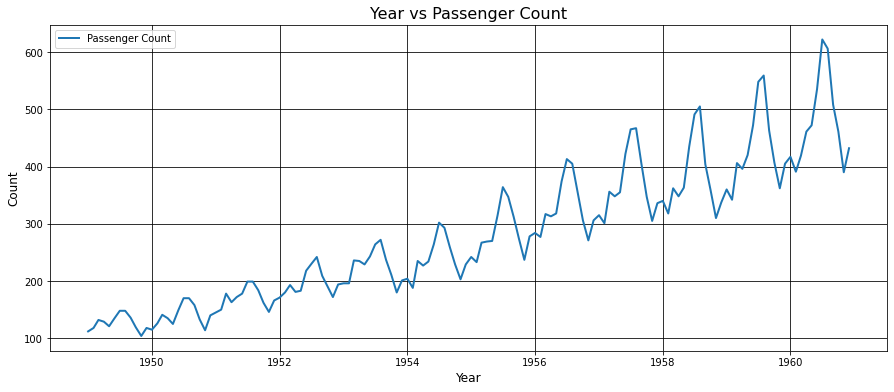

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(a,label="Passenger Count",lw=2)
plt.xlabel("Year",size=12)
plt.ylabel("Count",size=12)
plt.title("Year vs Passenger Count",size=16)
plt.grid(True,color="k")
plt.legend(loc=2);

**From the above line plot we can conclude that the Time Series is Multiplicative**

**Multiplicative: Series which has changing Amplitude (height) as well as changing Frequency (width)**

# **Seasonal Decomposition plot**

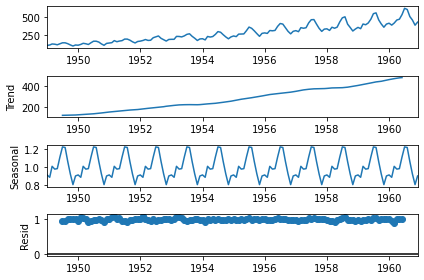

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
results=seasonal_decompose(a,model="multiplicative")

results.plot()
plt.show();

**From the seasonal decompose chart we can say that the mean is not constant. If the mean was constant the TREND line would have been straight. And the Standard Deviation will also be varying because of the varying mean**

**To forecast on ant time series data we always need Stationary Series and from the TREND line we concluded that the series is not stationary. Thus we will first need to convert the given Time Series to Stationary Time Series.**

**We can also check if the series is stationary or not by plotting Rolling Mean, Rolling Standard Deviation with respect to Observed Values.**

# **Rolling Mean**

In [ ]:
RM_a = a.rolling(window=12).mean()

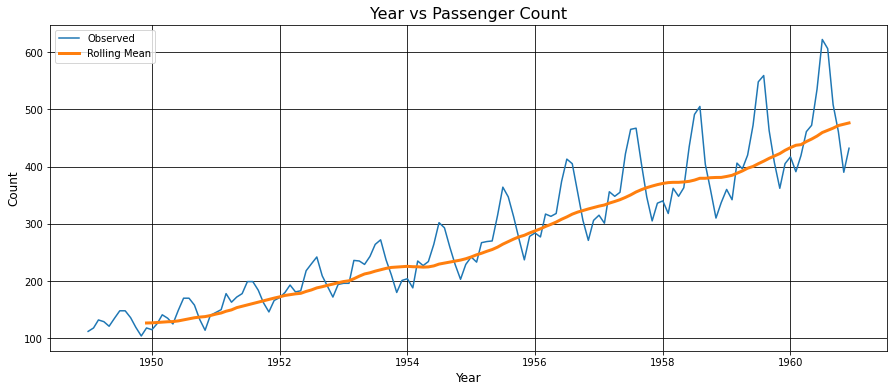

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(a,label="Observed")
plt.plot(RM_a,lw=3,label="Rolling Mean")
plt.xlabel("Year",size=12)
plt.ylabel("Count",size=12)
plt.title("Year vs Passenger Count",size=16)
plt.grid(True,color="k")
plt.legend(loc=2);

# **Rolling Standard Deviation**

In [ ]:
RS_a = a.rolling(window=12).std()

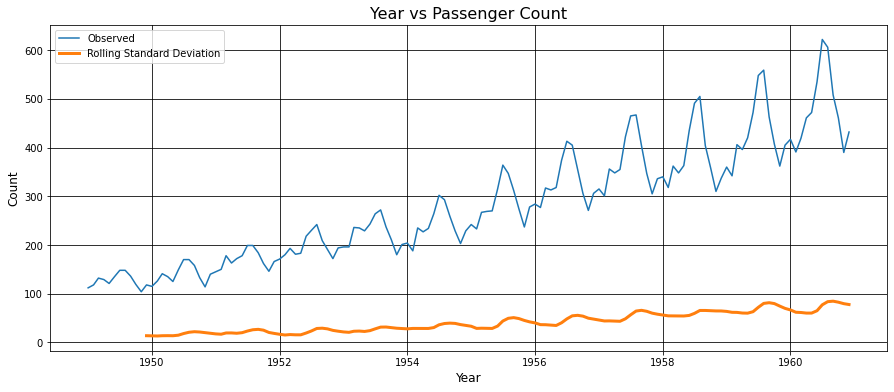

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(a,label="Observed")
plt.plot(RS_a,lw=3,label="Rolling Standard Deviation")
plt.xlabel("Year",size=12)
plt.ylabel("Count",size=12)
plt.title("Year vs Passenger Count",size=16)
plt.grid(True,color="k")
plt.legend(loc=2);

**The rolling standard deviation and rolling mean both are varying which indicates that our Time Series is Nonstationary.**

# **Converting Nonstationary time series to Stationary time series**

**We have many methods for this but the one I will use is very simple.**

**I will take the difference between (log of values) and (rolling mean of log values)**

In [ ]:
import numpy as np

In [ ]:
LOG_a=np.log(a)

In [ ]:
RM_LOG_a=LOG_a.rolling(window=12).mean()

In [ ]:
diff=LOG_a - RM_LOG_a

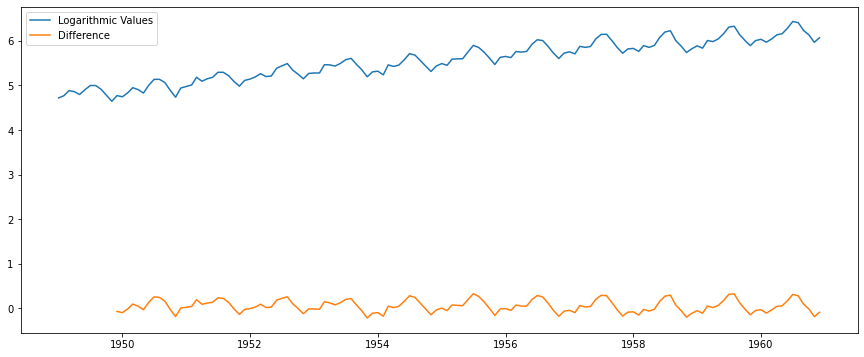

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(LOG_a,label="Logarithmic Values")
plt.plot(diff,label="Difference")
plt.legend(loc=2);

**Here, the inconsistency is reduced. And the rolling mean is almost constant throughout**

**Now we will consider the Difference as our new column on which we will try Forecasting**

In [ ]:
TS_new=diff
TS_new

,Pass
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


**We get NaN (null) values because of the WINDOW specified.**

# **Eliminating these NaN values**

In [ ]:
TS_new=TS_new[TS_new.Pass.isna()==False]
TS_new

,Pass
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [ ]:
TS_new.shape

(133, 1)

# **Train Test Split**

**In time series we use sequential sampling**

In [ ]:
#Training Set
trd=TS_new[0:106]

#Testing Set
tsd=TS_new[106:134]

# **Model Creation using AutoRegression Algorithm**

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
model=AutoReg(trd,lags=12).fit()

# **Predicting on Test Data (Seen Data)**

In [ ]:
tsd

,Pass
Month,
1958-10-01,-0.045657
1958-11-01,-0.193762
1958-12-01,-0.110499
1959-01-01,-0.049241
1959-02-01,-0.106598
1959-03-01,0.055385
1959-04-01,0.019679
1959-05-01,0.066365
1959-06-01,0.176286


In [ ]:
pred_ts = model.predict(start="1958-10-01",end="1960-12-01")

In [ ]:
pred_ts.head()

1958-10-01   -0.037129
1958-11-01   -0.132256
1958-12-01   -0.086974
1959-01-01   -0.062510
1959-02-01   -0.136801
Freq: MS, dtype: float64

# **Converting data back to original format**

In [ ]:
pred_a=pd.DataFrame(np.exp(pred_ts + RM_LOG_a.tail(27).Pass),columns=["Pass"])
pred_a

,Pass
1958-10-01,362.074874
1958-11-01,329.665472
1958-12-01,345.022132
1959-01-01,355.254891
1959-02-01,331.825018
1959-03-01,362.397462
1959-04-01,361.557750
1959-05-01,394.308061
1959-06-01,459.595119
1959-07-01,518.826980


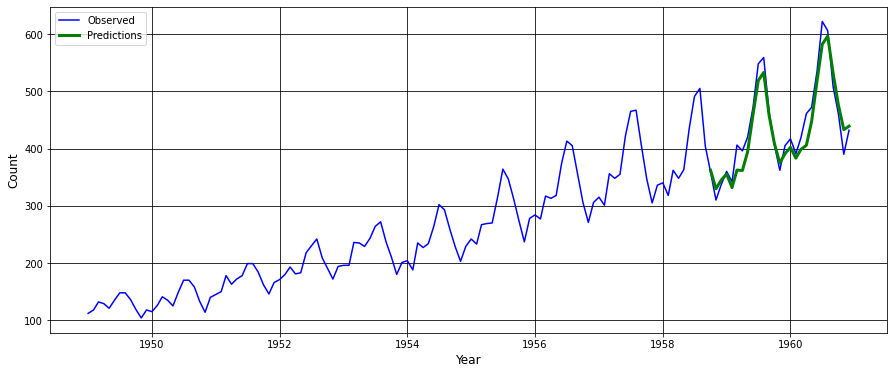

In [ ]:
plt.figure(figsize=(15,6))
#plt.plot(trd,label="Training Data",color="red")
#plt.plot(tsd,label="Testing Data",color="blue")
plt.plot(a,label="Observed",color="blue")
plt.plot(pred_a,label="Predictions",lw=3,color="green")
plt.xlabel("Year",size=12)
plt.ylabel("Count",size=12)
plt.grid(True,color="k")
plt.legend(loc=2);

# **Predicting on Unseen Data (1961 to 1965)**

In [ ]:
pred_us1=model.predict(end="1965-12-01")

In [ ]:
pred_us1.head()

1949-12-01   NaN
1950-01-01   NaN
1950-02-01   NaN
1950-03-01   NaN
1950-04-01   NaN
Freq: MS, dtype: float64

In [ ]:
T = RM_LOG_a[RM_LOG_a.Pass.isna()==False]
T

,Pass
Month,
1949-12-01,4.836178
1950-01-01,4.838381
1950-02-01,4.843848
1950-03-01,4.849344
1950-04-01,4.853133
...,...
1960-08-01,6.124517
1960-09-01,6.132246
1960-10-01,6.142628


In [ ]:
model_RML = AutoReg(T,lags=12).fit()

In [ ]:
pred_us2 = model_RML.predict(end="1965-12-01")

In [ ]:
pred_us2.head()

1949-12-01   NaN
1950-01-01   NaN
1950-02-01   NaN
1950-03-01   NaN
1950-04-01   NaN
Freq: MS, dtype: float64

pred_us2 --> Rolling Mean Log

pred_us1 --> q

In [ ]:
pred_us1.shape

(193,)

In [ ]:
pred_us2.shape

(193,)

In [ ]:
pred_us1=pred_us1[1:]

In [ ]:
FINAL_pred=np.exp(pred_us1+pred_us2)

In [ ]:
FINAL_pred

1949-12-01           NaN
1950-01-01           NaN
1950-02-01           NaN
1950-03-01           NaN
1950-04-01           NaN
                 ...    
1965-08-01    812.016588
1965-09-01    794.385893
1965-10-01    747.685911
1965-11-01    698.846436
1965-12-01    667.575498
Freq: MS, Length: 193, dtype: float64

# **Plot**

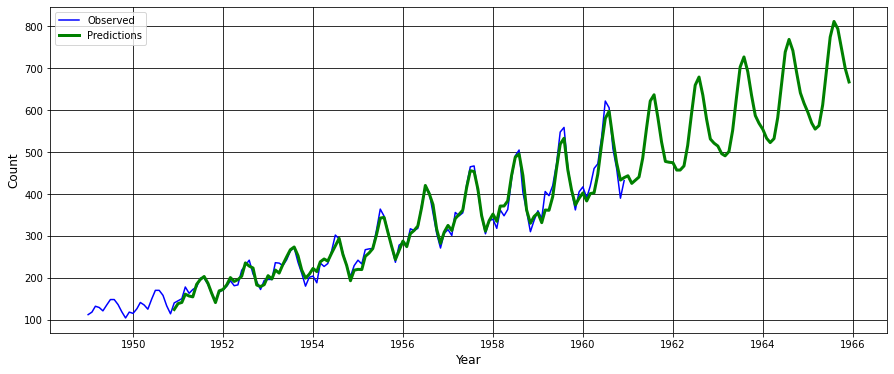

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(a,label="Observed",color="blue")
plt.plot(FINAL_pred,label="Predictions",lw=3,color="green")
plt.xlabel("Year",size=12)
plt.ylabel("Count",size=12)
plt.grid(True,color="k")
plt.legend(loc=2);

# **END**